# Results Preprocessing for TMaze experiments

In [33]:
import numpy as np
import os
import csv
import matplotlib.pyplot as plt

Experiment 'results/depth_start=0 depth_end=40 agent_type=original, step_reward=0 continuous_learning=True'
[(0, 5), (5, 22), (10, 27), (15, -1), (20, 25), (25, 3), (30, 3), (35, 27), (40, 11)]


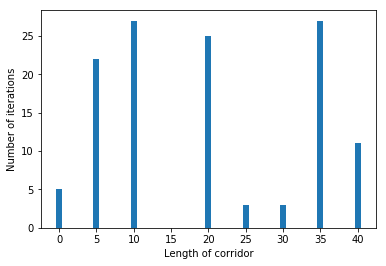

Experiment 'results/depth_start=0 depth_end=40 agent_type=original, step_reward=-0.1 continuous_learning=False'
[(0, 11), (5, 96), (10, 46), (15, 97), (20, 96), (25, -1), (30, 56), (35, 67), (40, -1)]


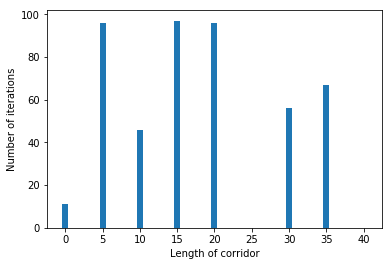

Experiment 'results/depth_start=0 depth_end=40 agent_type=original, step_reward=-0.1 continuous_learning=True'
[(0, 5), (5, -1), (10, -1), (15, -1), (20, -1), (25, -1), (30, -1), (35, -1), (40, -1)]


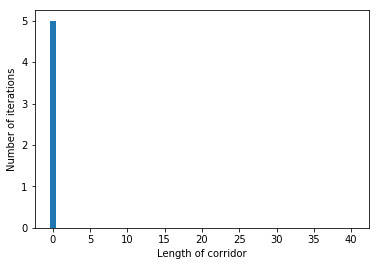

Experiment 'results/depth_start=0 depth_end=40 agent_type=original, step_reward=0 continuous_learning=False'
[(0, 15), (5, 23), (10, 21), (15, 21), (20, -1), (25, 40), (30, 50), (35, 50), (40, -1)]


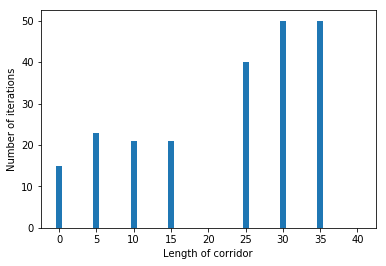

Experiment 'results/depth_start=0 depth_end=40 agent_type=passthru, step_reward=-0.1 continuous_learning=True'
[(0, 8), (5, 13), (10, -1), (15, -1), (20, -1), (25, -1), (30, -1), (35, -1), (40, -1)]


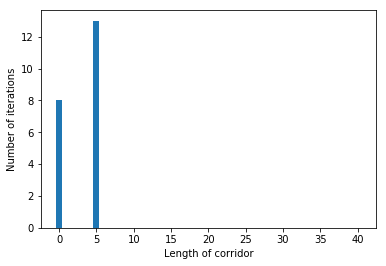

Experiment 'results/depth_start=0 depth_end=40 agent_type=passthru, step_reward=0 continuous_learning=True'
[(0, 7), (5, 11), (10, 1), (15, 1), (20, 1), (25, 1), (30, 1), (35, 1), (40, 1)]


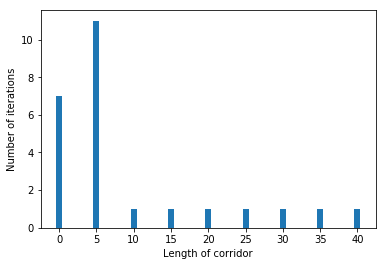

Experiment 'results/depth_start=0 depth_end=40 agent_type=passthru, step_reward=0 continuous_learning=False'
[(0, 10), (5, 9), (10, 6), (15, 12), (20, 17), (25, 57), (30, -1), (35, 26), (40, -1)]


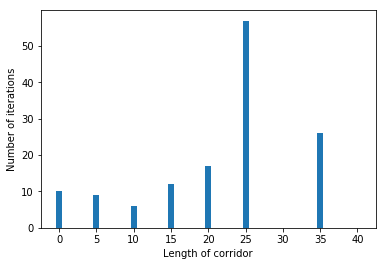

Experiment 'results/depth_start=0 depth_end=40 agent_type=passthru, step_reward=-0.1 continuous_learning=False'
[(0, 11), (5, 15), (10, 8), (15, 28), (20, 25), (25, -1), (30, -1), (35, 143), (40, -1)]


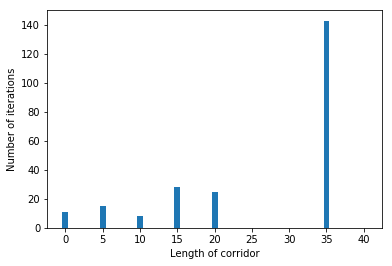

In [41]:
# Collect results for each experiment, at every depth

root = 'results'

experiments = {}

for experiment_folder in [os.path.join(root, name) for name in os.listdir(root) if os.path.isdir(os.path.join(root, name))]:
    
    if not os.path.isfile(os.path.join(experiment_folder, "done.txt")):
        # skip this folder as the experiment has not completed
        break
    
    print("Experiment '{}'".format(experiment_folder))
    
    depth_iterations = []
    
    # collect depth runs    
    for depth_folder in [os.path.join(experiment_folder, name) for name in os.listdir(experiment_folder) if os.path.isdir(os.path.join(experiment_folder, name))]:
        with open(os.path.join(depth_folder, 'results.csv'), 'r') as csvfile:
            reader = csv.reader(csvfile)
            rows = list(reader)
            depth, steps = [int(x) for x in rows[-1]]
            depth_iterations.append((depth, steps))
            
    depth_iterations.sort()        
    
    print(depth_iterations)
    
    x,y = zip(*depth_iterations)
    
    # change non convergence to 0
    y = [0 if x == -1 else x for x in y]
    
    plt.bar(x,y)
    
    plt.ylabel("Number of iterations")
    plt.xlabel("Length of corridor")
    
    plt.show()
    
    with open(os.path.join(experiment_folder, "all_results.csv"), 'w') as results:
            
        writer = csv.writer(results)

        head = ['depth','steps']
        
        writer.writerow(head)
        
        for row in depth_iterations:
            writer.writerow(row)        
